In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from ast import literal_eval
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans
from gensim.models import TfidfModel
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_score

In [2]:
tokenized_doc =pd.read_csv("tokenized.csv")

In [3]:
tokenized_doc['Content'] = tokenized_doc['Content'].apply(literal_eval)

In [4]:
tokenized_doc['Content']

0         [horrible, children, first, preschool, always,...
1         [friends, fantasy, friends, probably, go, make...
2         [cameras, sons, apartment, watch, life, detail...
3         [drive, little, high, something, always, promi...
4         [steal, little, sister, shop, lie, long, time,...
                                ...                        
427462    [person, best, friend, trust, share, mental, h...
427463    [dfiareahh, mannn, sexcond, verse, diaraeah, m...
427464    [always, wonder, side, pant, dicks, rest, natu...
427465    [anyone, thingsuse, items, remind, bluf, avoid...
427466                                 [wait, inlaws, feel]
Name: Content, Length: 427467, dtype: object

In [17]:
from gensim import corpora
# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(tokenized_doc['Content'])
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
corpus = [dictionary.doc2bow(doc) for doc in tokenized_doc['Content']]

In [23]:
tf_model = TfidfModel(corpus)

In [24]:
vector = tf_model[corpus] 

In [40]:
from gensim.matutils import corpus2dense, corpus2csc
num_docs = dictionary.num_docs
num_terms = len(dictionary.keys())
#corpus_tfidf_dense = corpus2dense(vector, num_terms, num_docs)
corpus_tfidf_sparse = corpus2csc(vector, num_terms=num_terms, num_docs=num_docs)

In [82]:
num_clusters = 10
km = MiniBatchKMeans(n_clusters=num_clusters)
km.fit(corpus_tfidf_sparse.T)
clusters = km.labels_.tolist()

In [86]:
cluster_labels = km.fit_predict(corpus_tfidf_sparse.T)

In [91]:
corpus_t = corpus_tfidf_sparse.T

In [92]:
inertia_list = []
K_list = range(2,50,2)
for i in K_list:
    KM = MiniBatchKMeans(n_clusters=i,batch_size=5000)
    KM.fit(corpus_t)
    inertia_list.append(KM.inertia_)
    print(KM.inertia_)

415231.774164082
414180.8268394545
413335.45377974986
412650.92113722995
412222.1450855177
411470.4838375799
410920.5868468535
410417.9372602412
409510.24842201394
409730.0463682391
408917.2672571361
408410.75368144945
408060.4868391073
407415.6274736868
406921.5251890077
407109.873799447
406147.69347331004
406045.53077083343
406085.6142319309
405182.5594894002
404754.88901841064
404641.6130402454
404310.26720562915
403849.0543282288


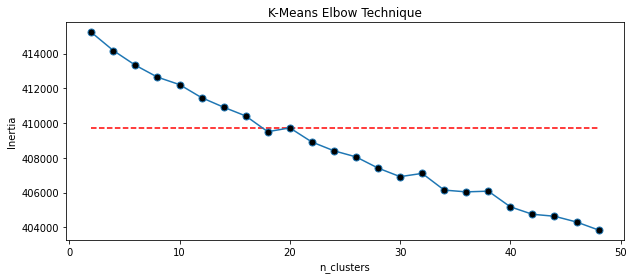

In [94]:
plt.figure(figsize=(10,4))
plt.plot(range(2,50,2), inertia_list, 'o-', markersize=7, markerfacecolor='black')
plt.xlabel('n_clusters'); plt.ylabel('Inertia'); plt.title('K-Means Elbow Technique')
plt.hlines(y = (inertia_list[9]), xmin=K_list[0], xmax=K_list[-1], color = 'r', linestyles = 'dashed')
plt.show()

In [100]:
n = K_list[9]
n

20

In [101]:
num_clusters = n
km = MiniBatchKMeans(n_clusters=n,batch_size=5000)
km.fit(corpus_t)

MiniBatchKMeans(batch_size=5000, n_clusters=20)

In [128]:
y = km.predict(corpus_t)

In [129]:
y[:10]

array([11,  4,  6, 11, 14,  6, 15,  6, 11, 11])

In [131]:
y2 = y.copy()

array([11,  4,  6, 11, 14,  6, 15,  6, 11, 11])

In [ ]:
## View cluster 3, 8, 14, 19

In [132]:
c3 = []
c8 = []
c14 = []
c19 = []
for i,s in enumerate(y2):
    if s == 3:
        c3.append(i)
    elif s == 8:
        c8.append(i)
    elif s == 14:
        c14.append(i)
    elif s == 19:
        c19.append(i)

In [133]:
print(tokenized_doc['Content'][c3[:10]])

621     [people, hurt, take, hurt, people, nothing, so...
2569    [drugsalcohol, escape, sorry, anything, spell,...
2590    [steal, stuff, recently, get, steal, love, rus...
2950    [today, relapse, months, control, addiction, t...
3293    [open, letter, address, happen, minutes, live,...
3473    [pretend, someone, fuck, literal, fake, someon...
3512    [suck, fuck, ladyboys, cock, bottom, suck, coc...
3642    [piss, dump, window, night, house, arrest, mon...
3669    [gigantic, commitment, issue, probably, think,...
3674    [love, bitch, exactly, title, say, love, compa...
Name: Content, dtype: object


In [134]:
print(tokenized_doc['Content'][c8[:10]])

50     [steal, money, parent, credit, card, trick, sa...
140    [use, collect, people, personal, data, address...
158    [steal, people, steal, account, sell, kind, kl...
196    [scammed, 65000, worth, virtual, items, find, ...
260    [modify, late, night, fee, store, keep, money,...
293    [buy, things, without, permission, parent, car...
362    [share, innocent, picture, strangers, feel, li...
412    [lie, blame, someone, else, mistake, make, str...
418    [years, steal, money, sisters, title, imply, s...
429    [bully, friend, fake, account, middle, school,...
Name: Content, dtype: object


In [135]:
print(tokenized_doc['Content'][c14[:10]])

4      [steal, little, sister, shop, lie, long, time,...
28     [kick, hole, drywall, bathroom, things, angry,...
69     [use, steal, younger, pass, away, younger, use...
71     [join, bully, order, protect, take, place, aro...
100    [steal, things, sister, cherish, destroy, noti...
126    [regularly, steal, potato, chip, nearby, conve...
176    [fake, asthma, attack, admit, hospital, child,...
177    [steal, money, aunt, still, grade, still, grad...
183    [lie, school, best, friend, expel, backstory, ...
209    [cheat, test, hate, little, backstory, parent,...
Name: Content, dtype: object


In [136]:
print(tokenized_doc['Content'][c19[:10]])

116     [work, sneak, conference, room, steal, good, d...
342     [spike, entire, offices, coffee, supply, decaf...
597     [suppose, log, hours, home, today, even, look,...
1178    [steal, 5000, first, become, manager, work, lo...
1372    [drink, dads, half, half, go, teenager, colleg...
1458    [friend, mix, teachers, coffee, smoothie, toge...
1900    [use, steal, parent, liquor, cabinet, parent, ...
2127    [use, steal, coffee, 1819, move, east, coast, ...
2170    [use, grandmothers, debit, card, without, perm...
2194    [charge, people, alcoholic, drink, small, conf...
Name: Content, dtype: object


In [137]:
y.shape

(427467,)

In [138]:
silhouette_avg = silhouette_score(corpus_t, y)
silhouette_avg

-0.0003168840175878326

In [ ]:
# https://www.aifinesse.com/k-means/k-means-tuning/#:~:text=Tuning%20is%20a%20crucial%20aspect%20of%20K-Means%20implementations,require%20analyst%20or%20scientist%20to%20adjust%20n_clustersmultiple%20times.